# Project 2: Titanic Dataset Exploration
**Author:** Deb St. Cyr  
**Date:** October 30, 2025

### Objective

The objective of this project is to identify patterns and key factors that influenced passenger survival on the Titanic.  
By examining demographic, socioeconomic, and travel-related features, we aim to determine which variables — such as passenger class, gender, age, 
and family size — show the strongest relationships with survival outcomes.  
This exploration prepares the dataset for future machine learning modeling, ensuring data is clean, well-understood, and ready for predictive analysis.


### Introduction

This notebook explores the **Titanic passenger dataset** to analyze which factors most influenced survival outcomes.  
Using a structured workflow modeled after Lab 2, this project demonstrates foundational data-science techniques for data preparation, visualization, and model readiness.  

We will:

- **Import and inspect** the dataset to understand its structure and key features  
- **Explore** relationships and distributions through informative visualizations  
- **Handle missing data** and perform **feature engineering** to improve dataset quality  
- **Select features** and define a prediction target for modeling (survival)  
- **Compare** a standard random train/test split with a **stratified split** to maintain class balance  

Each section concludes with a brief **Reflection** prompt to reinforce analytical thinking and interpretation.

In [1]:
# Imports (single cell, import each lib only once)
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# Display settings for readability
pd.set_option("display.max_columns", 100)
sns.set_theme()

## 1. Import and Inspect the Data
We load the Titanic dataset **directly from seaborn** for consistency across environments.

In [2]:
# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Basic info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# First 10 rows
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [273]:
# Missing values per column
print("Missing Values:")
print(titanic.isnull().sum())

Missing Values:
survived          0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       0
alive             0
alone             0
family_size       0
sex_num           0
embarked_num      2
alone_num         0
dtype: int64


In [274]:
# Summary statistics
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208   
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       family_size     sex_num  embarked_num   alone_num  
count   891.000000  891.000000    889.000000  891.000000  
mean      1.904602    0.352413      1.535433    0.602694  
std       1.613459    0.477990      0.792088    0.489615  
min       1.000000    0.000000    

In [275]:
# Correlations
print(titanic.corr(numeric_only=True))

              survived    pclass       age     sibsp     parch      fare  \
survived      1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
pclass       -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
age          -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
sibsp        -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
parch         0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
fare          0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
adult_male   -0.557080  0.094035  0.247704 -0.253586 -0.349943 -0.182024   
alone        -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   
family_size   0.016639  0.065997 -0.245619  0.890712  0.783111  0.217138   
sex_num       0.543351 -0.131900 -0.081163  0.114631  0.245489  0.182333   
embarked_num -0.169718  0.164681 -0.020933  0.068900  0.040449 -0.226311   
alone_num    -0.203367  0.135207  0.171647 -0.584471 -0.583398 -0.271832   

           

In [ ]:
# Compute correlation matrix (numeric only)
corr_matrix = titanic.corr(numeric_only=True)

# Unstack and sort correlations
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Remove self-correlations (feature correlated with itself)
corr_pairs = corr_pairs[corr_pairs < 1]

# Show the top 5 strongest correlations
corr_pairs.head(5)

sibsp        family_size    0.890712
family_size  sibsp          0.890712
parch        family_size    0.783111
family_size  parch          0.783111
sex_num      survived       0.543351
dtype: float64

### Reflection 1
1) How many data instances are there? 891
2) How many total features (columns) are there? 15
3) What are their names? survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone 
4) Which columns have missing values? embarked, deck, and emarked_town
5) Which features are **non-numeric**?  sex, class, who, adult_male, deck, embark_town, alive, and alone
6) Are the data instances sorted on any attribute?  Not that I can tell.
7) What are the units of `age`? (How can you tell?) It is an assumption that each age is one or two values.
8) What are the min, median, and max of `age`? 0.42, 29 and 80  
9) Which **two different** features have the highest correlation?  The sibsp and family_size have the highest correlation of 0.89.
10) Which categorical features might be useful for prediction, and why? sex, class, and embarked. 
        1)  Females were evacuated first and would have a higher chance of survival.
        2)  Class reflects socio-economic status with access to lifeboats for first class passengers having a higher survival rate.
        3)  Embarked could capture demographics with location of port departure.

## 2. Data Exploration and Preparation
We'll visualize numerical distributions and simple relationships. For categorical features, use count or bar plots.

### 2.1 Explore Data Patterns and Distributions

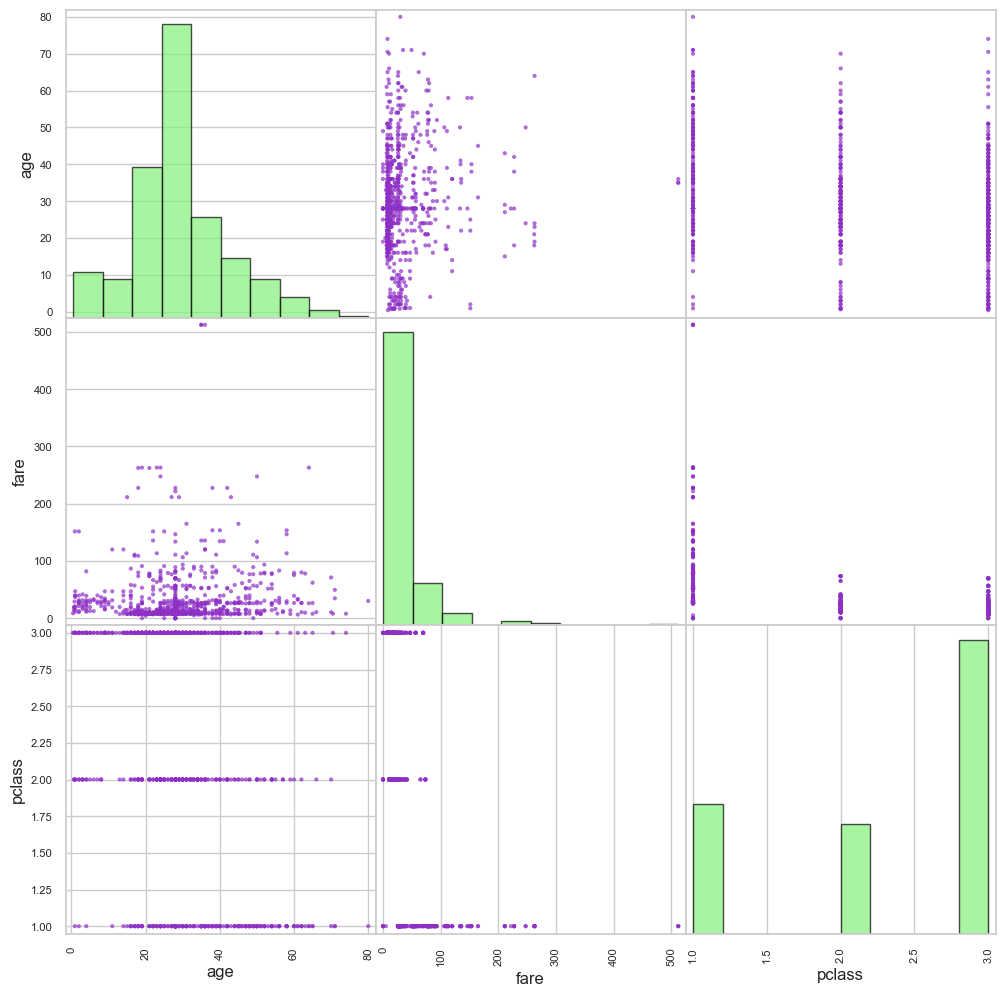

In [471]:
# Scatter matrix for age, fare, and pclass
attributes = ["age", "fare", "pclass"]
axes = scatter_matrix(titanic[attributes], figsize=(12, 12), color="#8e2fc5a2", alpha=0.7)

# Loop through the diagonal subplots and recolor the histograms
n = len(attributes)
for i in range(n):
    ax = axes[i, i]
    for patch in ax.patches:
        patch.set_facecolor("#85f07ba6")
        patch.set_edgecolor("black")
        patch.set_alpha(0.7)

plt.show()

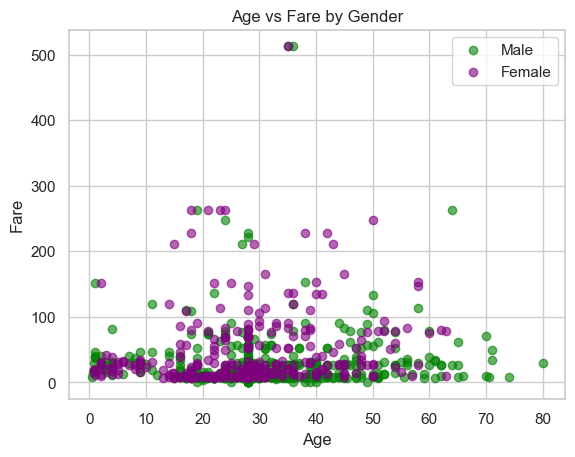

In [472]:
# Scatterplot: age vs fare
male = titanic[titanic["sex"] == "male"]
female = titanic[titanic["sex"] == "female"]

plt.scatter(male["age"], male["fare"], color="green", alpha=0.6, label="Male")
plt.scatter(female["age"], female["fare"], color="purple", alpha=0.6, label="Female")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Gender")
plt.legend()
plt.show()

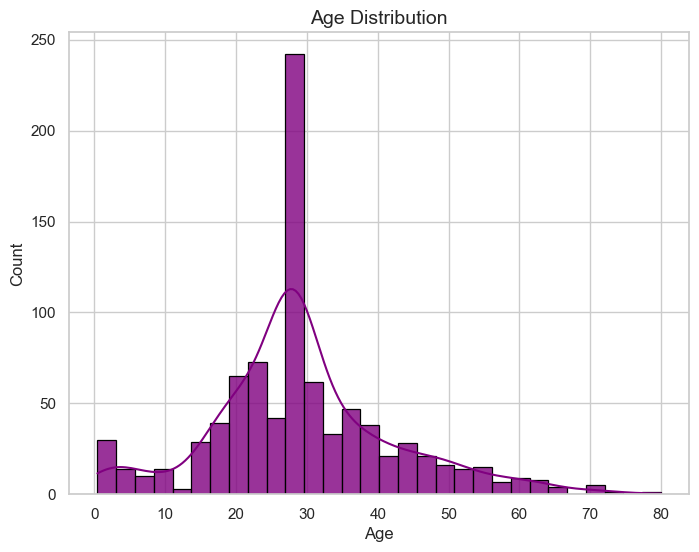

In [538]:
# Histogram of age
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("deep")

# Histogram + KDE on same scale (count)
plt.figure(figsize=(8, 6))
sns.histplot(
    data=titanic,
    x="age",
    kde=True,  # enables the smooth line
    bins=30,  # number of histogram bars
    color="purple",  # fill color
    edgecolor="black",  # thin black edges
    linewidth=0.9,
    alpha=0.8,  # slight transparency
)

plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

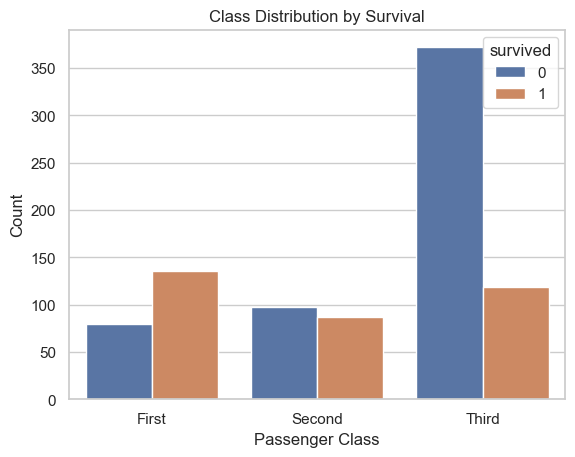

In [539]:
# Count plot: class by survival
sns.countplot(x="class", hue="survived", data=titanic)
plt.title("Class Distribution by Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

In [562]:
import pandas as pd

# counts by class × survived
ct = pd.crosstab(titanic["class"], titanic["survived"])

# row-wise percentages
pct = ct.div(ct.sum(axis=1), axis=0).mul(100)

# (optional) if you only want Third class quickly:
third_pct = pct.loc["Third"]
print(third_pct)  # survived=0 and 1 percentages

survived
0    75.763747
1    24.236253
Name: Third, dtype: float64


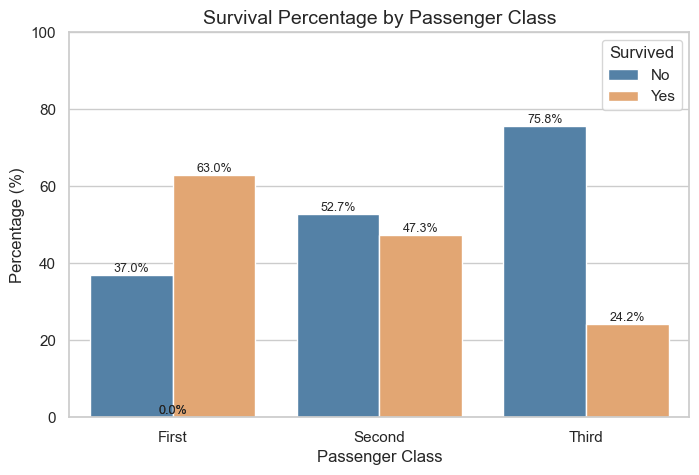

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Crosstab → Percent
ct = pd.crosstab(titanic["class"], titanic["survived"])
pct = ct.div(ct.sum(axis=1), axis=0).mul(100)

# Reshape for Seaborn
dfp = pct.reset_index().melt(id_vars="class", var_name="survived", value_name="percent")

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=dfp, x="class", y="percent", hue="survived", palette={0: "steelblue", 1: "sandybrown"}
)
ax.set_title("Survival Percentage by Passenger Class", fontsize=14)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.set_xlabel("Passenger Class", fontsize=12)
ax.set_ylim(0, 100)

# Fix legend (custom labels + matching colors)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ["No", "Yes"],  # human-readable labels
    title="Survived",
    loc="best",
)

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.show()

**Reflection 2.1**  
- What patterns or anomalies do you notice? Second-Class survival rate is close to 50%. It’s almost evenly split, unlike first and third class, showing that survival in second class may have been influenced by other factors like gender or location of cabins.
- Which features look promising as predictors of survival? Age and social class may have also been a factor in survival rate. The first class again had access to the life boats, but the young and old would still have succumbed to the cold air and water.
- Do you see any **class imbalances** in the target (`survived`)?  In the third-class group, about 76% of passengers did not survive, and only 24% survived. This shows a strong class imbalance and suggests that passenger class (socioeconomic status) was an important predictor of survival.

### 2.2 Handle Missing Values and Clean Data

In [583]:
# Impute missing values for age with median
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# Fill missing values for embark_town with mode
titanic["embark_town"] = titanic["embark_town"].fillna(titanic["embark_town"].mode()[0])

### 2.3 Feature Engineering

In [584]:
# Family size = sibsp + parch + 1 (self)
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Encode categoricals to numeric (new columns to preserve originals)
titanic["sex_num"] = titanic["sex"].map({"male": 0, "female": 1})
titanic["embarked_num"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

# Binary 'alone' feature (already exists as bool -> convert to int copy)
titanic["alone_num"] = titanic["alone"].astype(int)

titanic[["family_size", "sex_num", "embarked_num", "alone_num"]].head()

,family_size,sex_num,embarked_num,alone_num
0,2,0,2.0,0
1,2,1,0.0,0
2,1,1,2.0,1
3,2,1,2.0,0
4,1,0,2.0,1


**Reflection 2.3**  
- Why might `family_size` help predict survival? The more in a family the greater chance of helping each other make it to a life boat.
- Why convert categorical features to numbers before modeling? Converting categorical features to numeric form allows the model to perform mathematical calculations and identify patterns.

## 3. Feature Selection and Justification
We'll use **survived** as the classification target and select several intuitive predictors.

In [585]:
# Select features (X) and target (y)
feature_cols = ["age", "fare", "pclass", "sex_num", "family_size"]
X = titanic[feature_cols].copy()
y = titanic["survived"].copy()

X.head(), y.head()

(    age     fare  pclass  sex_num  family_size
 0  22.0   7.2500       3        0            2
 1  38.0  71.2833       1        1            2
 2  26.0   7.9250       3        1            1
 3  35.0  53.1000       1        1            2
 4  35.0   8.0500       3        0            1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

**Reflection 3**  
- Why these features? Which do you expect to be most predictive and why?  
- Are there any other features you'd consider adding or removing?

## 4. Splitting
Compare a **basic train/test split** with a **stratified** split (stratified by the target `survived`).

In [586]:
# Basic train/test split
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print("Basic Split — Train size:", len(X_train_basic), " Test size:", len(X_test_basic))

Basic Split — Train size: 712  Test size: 179


In [587]:
# Stratified split by the target 'survived'
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx, test_idx in splitter.split(X, y):
    X_train_strat = X.iloc[train_idx]
    X_test_strat = X.iloc[test_idx]
    y_train_strat = y.iloc[train_idx]
    y_test_strat = y.iloc[test_idx]

print("Stratified Split — Train size:", len(X_train_strat), " Test size:", len(X_test_strat))

Stratified Split — Train size: 712  Test size: 179


In [588]:
# Compare class distributions (original vs. each split)
print("Original Class Distribution (survived):")
print(y.value_counts(normalize=True).sort_index())

print("\nBasic Split — Class Distribution (survived):")
print(y_train_basic.value_counts(normalize=True).sort_index())
print(y_test_basic.value_counts(normalize=True).sort_index())

print("\nStratified Split — Class Distribution (survived):")
print(y_train_strat.value_counts(normalize=True).sort_index())
print(y_test_strat.value_counts(normalize=True).sort_index())

Original Class Distribution (survived):
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Split — Class Distribution (survived):
survived
0    0.610955
1    0.389045
Name: proportion, dtype: float64
survived
0    0.636872
1    0.363128
Name: proportion, dtype: float64

Stratified Split — Class Distribution (survived):
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


**Reflection 4**  
- Why does stratification (by `survived`) often improve model evaluation quality?  
- How close are the split distributions compared to the original?  
- Which split preserved class balance better here?